# همبستگی متقاطع ۵ سهم خارجی و داخلی

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools
import matplotlib.pyplot as plt

import yfinance as yf       # https://pypi.org/project/yfinance/
import pytse_client as tse # https://pypi.org/project/pytse-client/

پنج سهم حوزه فناوری خارجی که ممکن است با هم همبستگی متقاطع داشته باشند انتخاب شده‌اند: اپل، مایکروسافت، اچ‌پی، ادوبی و آی‌بی‌ام.

In [6]:
tickers_nse = ['AAPL', 'MSFT', 'HPQ', 'ADBE', 'IBM']
data_nse = yf.download(tickers_nse, group_by = 'ticker', start="2019-01-01", end="2022-11-25")

[*********************100%***********************]  5 of 5 completed


## توابع کمکی

تابعی برای محاسبه همبستگی متقاطع به کمک پکیج statstools می‌نویسیم.

این تابع، با دریافت دو سری زمانی و مقدار لگ مورد نظر، یک عدد به عنوان خروجی می‌دهد:

In [7]:
def get_cross_corr(a, b, lag=1) -> float:
    a = a[lag:]
    l = min(len(a), len(b))
    a, b = a[-l:], b[-l:]
    corr = sm.tsa.stattools.ccf(a, b)
    return corr[lag]

یک تابع برای ویژوال کردن نتیجه می‌نویسیم. اصل این تابع مربوط پکیج statsmoels برای رسم `confusion_matrix` است که برای رسم نمودارهای این تمرین شخصی‌سازی‌ شده است.

In [8]:
def conf_mat_subplot(cm, ax, title):
  n_classes = cm.shape[0]
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  # fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title=title,
        xlabel="",
        ylabel="",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(12)
  ax.yaxis.label.set_size(12)
  ax.title.set_size(12)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax.text(j, i, f"{cm[i, j]}",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=6)

## همبستگی متقاطع سهام خارجی

در یک حلقه for همبستگی متقاطع هر ترکیب دوتایی از سهام را برای لگ‌های ۰ تا ۱۱ محاسبه می‌کنیم و هر کدام را در یک جدول می‌کشیم.

همبستگی متقاطع بازده‌ها در زیر آورده شده است:

** Cross-Correlation Matrix for returns of 5 NSE stocks: **
Tickers in order from 0 to 4 are:
['AAPL', 'MSFT', 'HPQ', 'ADBE', 'IBM']


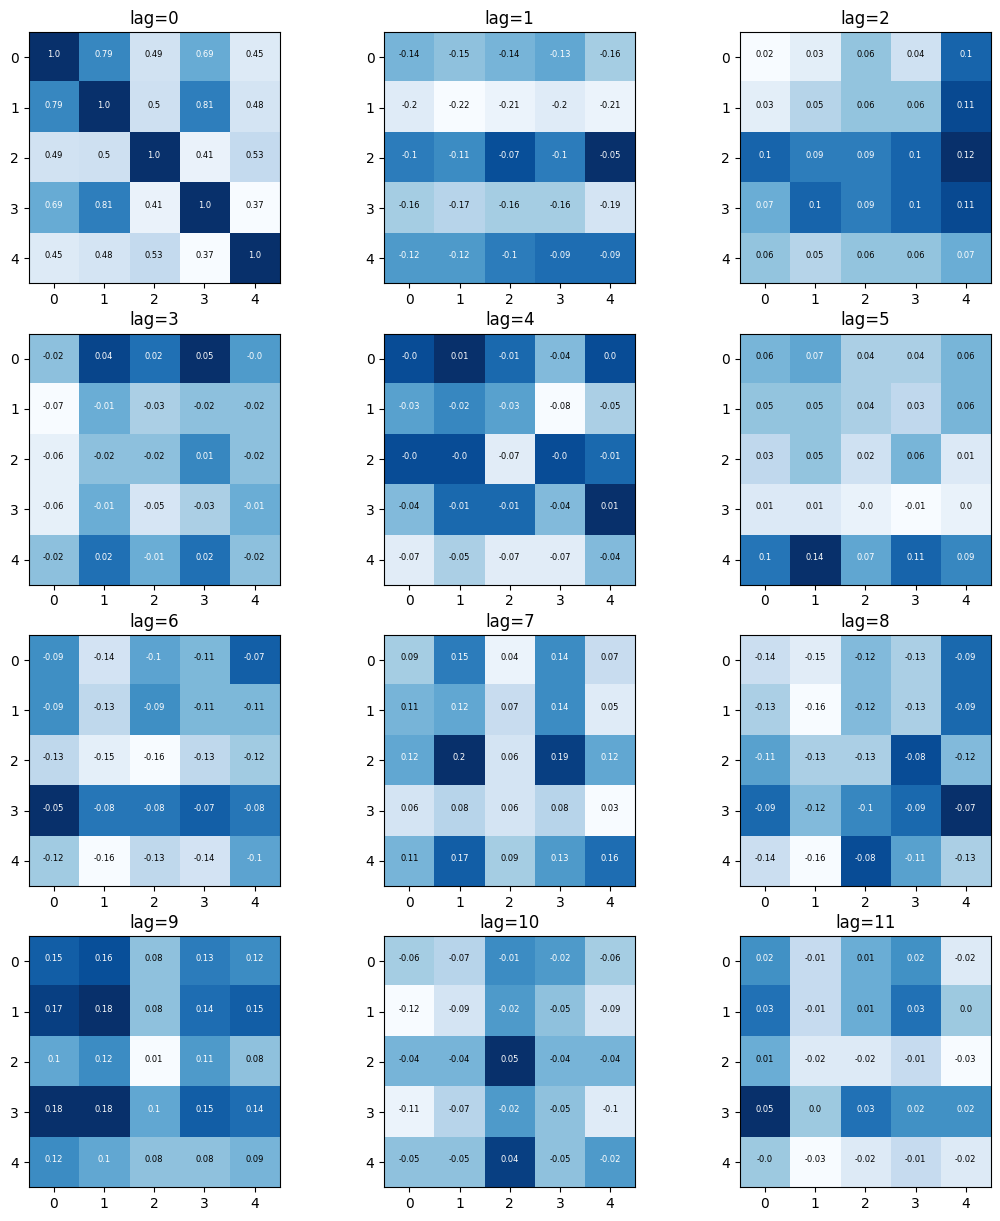

In [9]:
corr_mat = np.zeros(shape=(5,5))
a = np.random.randint(0, 10, size=(5, 20))
tickers_len = len(tickers_nse)

print('** Cross-Correlation Matrix for returns of 5 NSE stocks: **')
print('Tickers in order from 0 to 4 are:')
print(tickers_nse)

figsize = (13, 15)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=figsize)

for lag in range(0, 12):
    for i, j in itertools.product(range(tickers_len), range(tickers_len)):
        p_i = np.array(data_nse[tickers_nse[i], 'Adj Close'].pct_change().dropna())
        p_j = np.array(data_nse[tickers_nse[j], 'Adj Close'].pct_change().dropna())
        corr_mat[i, j] = get_cross_corr(p_i, p_j, lag=lag)
    
    cm = corr_mat.round(2)
    ax=axes.flat[lag]
    title = f'lag={lag}'
    conf_mat_subplot(cm, ax, title=title)

همبستگی متقاطع قیمت‌ها در زیر آورده شده است:

** Cross-Correlation Matrix for returns of 5 NSE stocks: **
Tickers in order from 0 to 4 are:
['AAPL', 'MSFT', 'HPQ', 'ADBE', 'IBM']


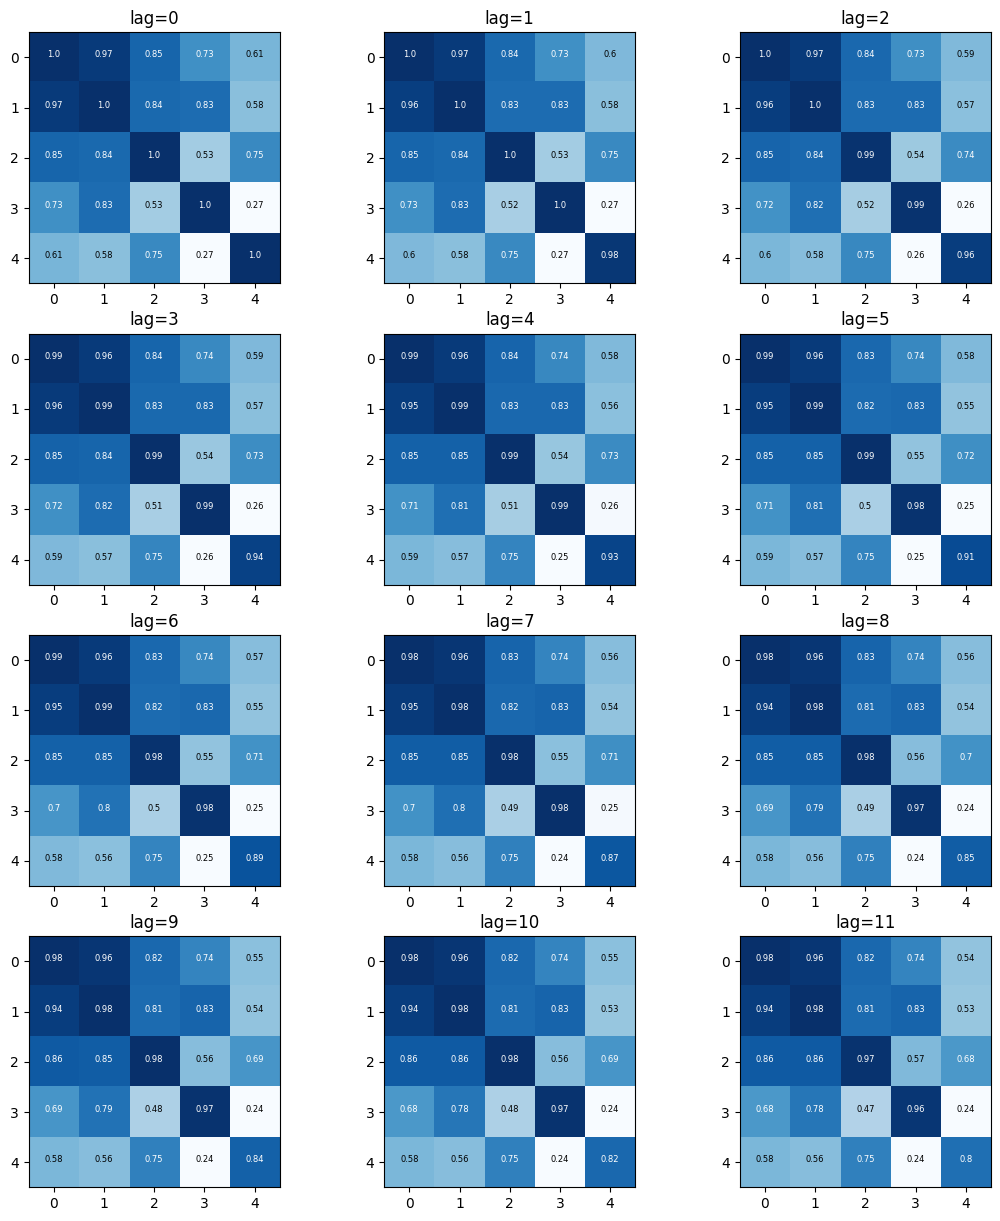

In [10]:
corr_mat = np.zeros(shape=(5,5))
a = np.random.randint(0, 10, size=(5, 20))
tickers_len = len(tickers_nse)

print('** Cross-Correlation Matrix for returns of 5 NSE stocks: **')
print('Tickers in order from 0 to 4 are:')
print(tickers_nse)

figsize = (13, 15)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=figsize)

for lag in range(0, 12):
    for i, j in itertools.product(range(tickers_len), range(tickers_len)):
        p_i = np.array(data_nse[tickers_nse[i], 'Adj Close'])
        p_j = np.array(data_nse[tickers_nse[j], 'Adj Close'])
        corr_mat[i, j] = get_cross_corr(p_i, p_j, lag=lag)
    
    cm = corr_mat.round(2)
    ax=axes.flat[lag]
    title = f'lag={lag}'
    conf_mat_subplot(cm, ax, title=title)

## همبستگی متقاطع سهام ایرانی

پنج سهم ایرانی از صنعت بانکی برای این تمرین انتخاب شده‌اند: وبصادر، ونوین، وتجارت، وبملت، وخاور

In [15]:
tickers_tse = ['وبصادر', 'وبملت', 'وتجارت', 'ونوین', 'وخاور']
prices_dict = tse.download(symbols=tickers_tse, adjust=True)
prices_dict_reform = {(outerKey, innerKey):
                             values for outerKey, innerDict 
                             in prices_dict.items() for innerKey, values 
                             in innerDict.iteritems()}
data_tse = pd.DataFrame(prices_dict_reform)
d = {'وبصادر': 'Saderat', 'وبملت': 'Mellat', 'وتجارت' : 'Tejarat', 'ونوین' : 'Novin', 'وخاور' : 'Khavar'}
data_tse = data_tse.rename(columns=d, level=0)
data_tse = data_tse.dropna()[-1*365:]

همبستگی متقاطع بازده‌ها:

** Cross-Correlation Matrix for returns of 5 NSE stocks: **
Tickers in order from 0 to 4 are:
['Khavar', 'Mellat', 'Novin', 'Saderat', 'Tejarat']


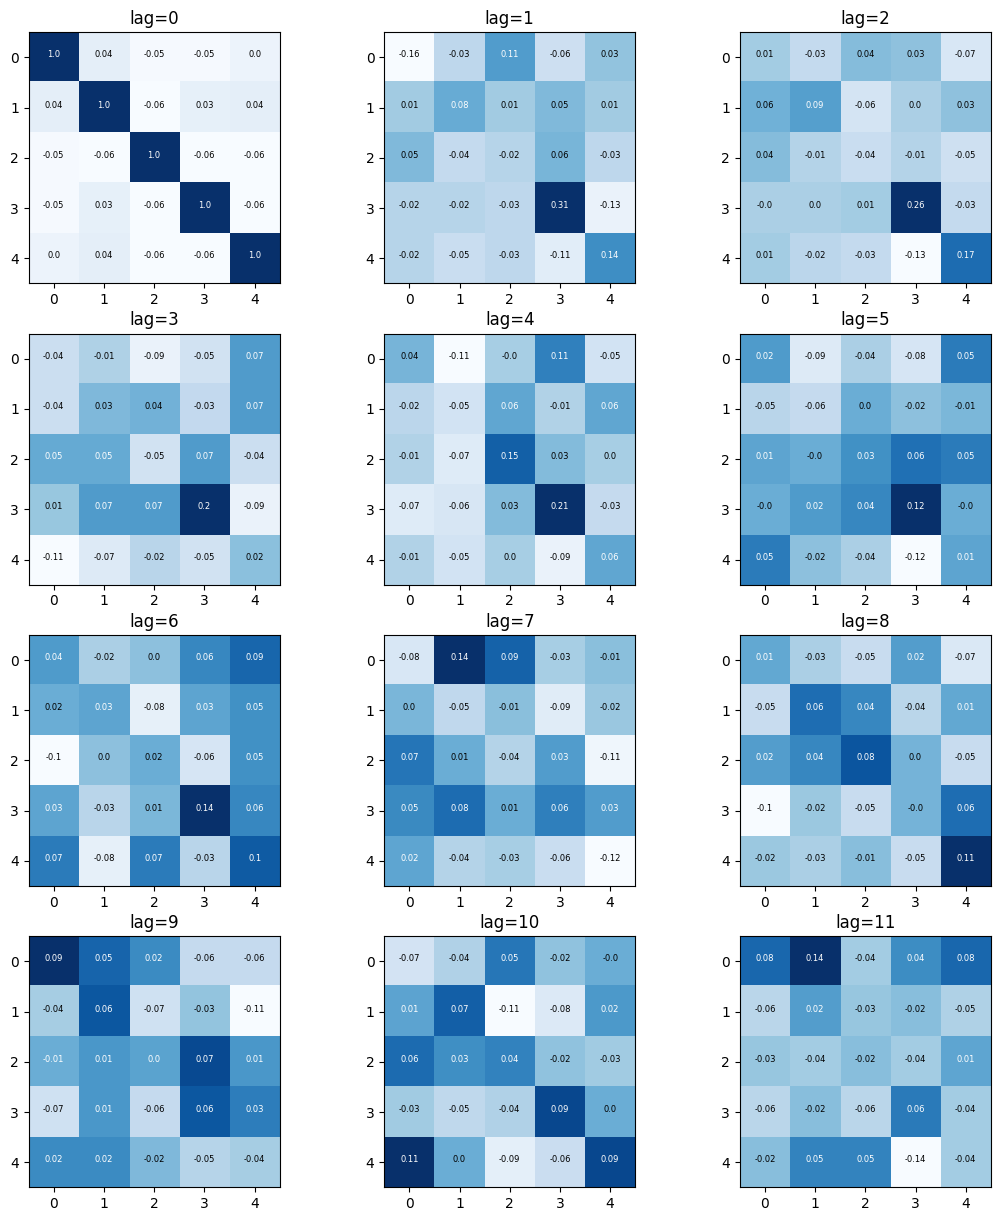

In [16]:
corr_mat = np.zeros(shape=(5,5))
a = np.random.randint(0, 10, size=(5, 20))
tickers_tse2 = list(data_tse.columns.levels[0])
tickers_len = len(tickers_tse2)


print('** Cross-Correlation Matrix for returns of 5 NSE stocks: **')
print('Tickers in order from 0 to 4 are:')
print(tickers_tse2)

figsize = (13, 15)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=figsize)

for lag in range(0, 12):
    for i, j in itertools.product(range(tickers_len), range(tickers_len)):
        p_i = np.array(data_tse[tickers_tse2[i], 'close'].pct_change().dropna())
        p_j = np.array(data_tse[tickers_tse2[j], 'close'].pct_change().dropna())
        corr_mat[i, j] = get_cross_corr(p_i, p_j, lag=lag)
    
    cm = corr_mat.round(2)
    ax=axes.flat[lag]
    title = f'lag={lag}'
    conf_mat_subplot(cm, ax, title=title)

همبستگی متقاطع قیمت‌ها:

** Cross-Correlation Matrix for returns of 5 NSE stocks: **
Tickers in order from 0 to 4 are:
['Khavar', 'Mellat', 'Novin', 'Saderat', 'Tejarat']


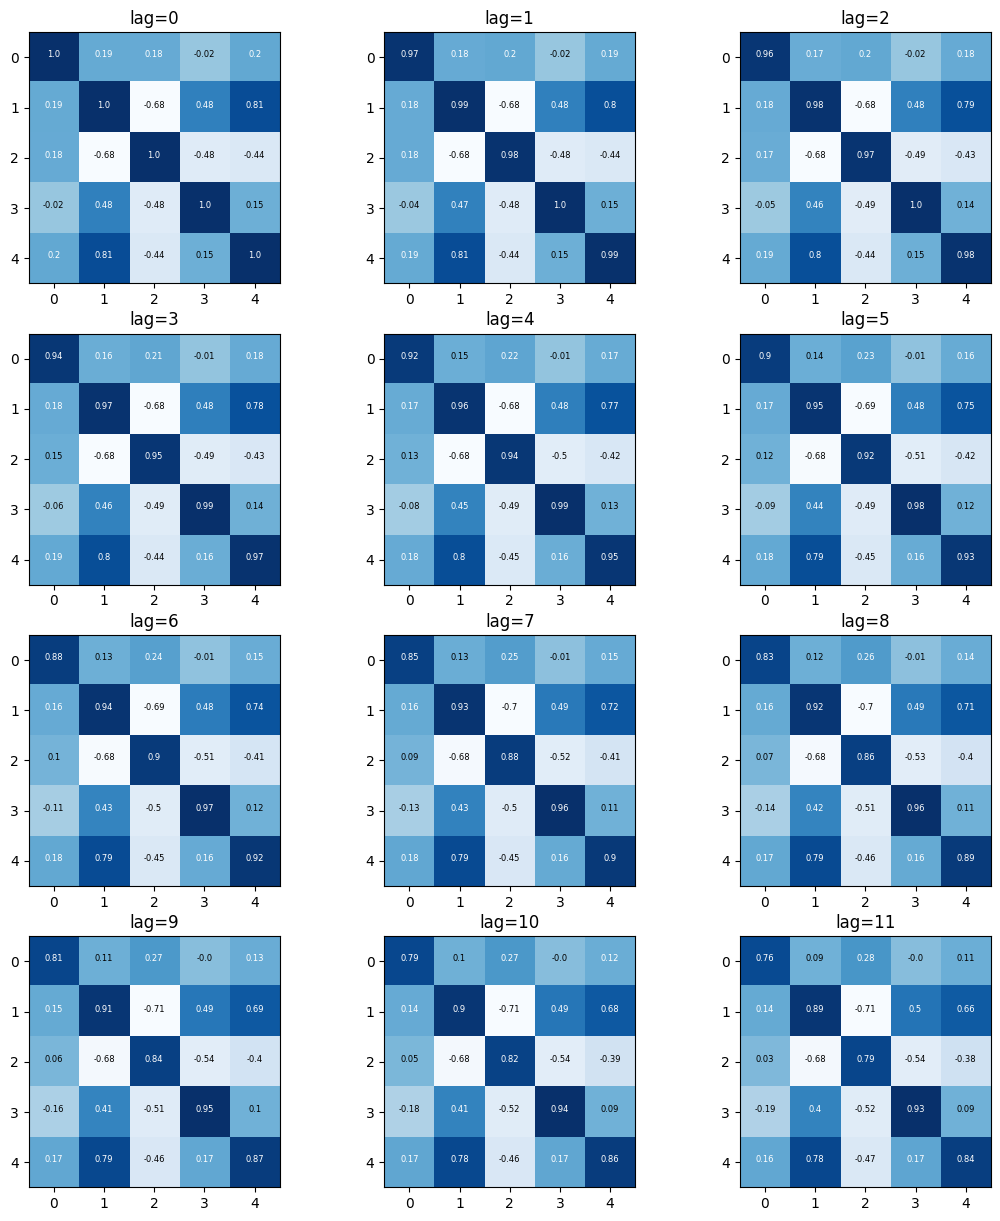

In [17]:
corr_mat = np.zeros(shape=(5,5))
a = np.random.randint(0, 10, size=(5, 20))
tickers_tse2 = list(data_tse.columns.levels[0])
tickers_len = len(tickers_tse2)


print('** Cross-Correlation Matrix for returns of 5 NSE stocks: **')
print('Tickers in order from 0 to 4 are:')
print(tickers_tse2)

figsize = (13, 15)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=figsize)

for lag in range(0, 12):
    for i, j in itertools.product(range(tickers_len), range(tickers_len)):
        p_i = np.array(data_tse[tickers_tse2[i], 'close'])
        p_j = np.array(data_tse[tickers_tse2[j], 'close'])
        corr_mat[i, j] = get_cross_corr(p_i, p_j, lag=lag)
    
    cm = corr_mat.round(2)
    ax=axes.flat[lag]
    title = f'lag={lag}'
    conf_mat_subplot(cm, ax, title=title)